In [1]:
import sys
import os
from pathlib import Path

root_dir = Path(os.getcwd())

if str(root_dir.parents[1]) not in sys.path:
  sys.path.append(str(root_dir.parents[1]))

#print(sys.path)

from LMORL.BAN.API.agents.DQNHybrid import DQNHybrid

import mo_gymnasium as mo_gym

env = mo_gym.make("mo-mountaincar-v0", render_mode="rgb_array")

c:\Python310\lib\site-packages\gymnasium\envs\registration.py:531: UserWarning: WARN: Using the latest versioned environment `mo-mountaincar-v0` instead of the unversioned environment `mo-mountaincar`.
  logger.warn(


In [2]:

input_size = env.observation_space.shape[0]
num_actions = int(env.action_space.n)
action_space = list(range(env.action_space.n))
learning_rate = 0.001
epsilon_decay = 0.995
epsilon_min = 0.1
batch_size = 64
train_start = 64
hidden_size = 128
BAN_SIZE = 3
max_memory_size=2000

agent = DQNHybrid(input_size=input_size, num_actions=num_actions,
                  action_space=action_space, learning_rate=learning_rate,
                  epsilon_decay=epsilon_decay, epsilon_min=epsilon_min,
                  batch_size=batch_size, hidden_size=hidden_size,
                  ban_size=3, max_memory_size=max_memory_size, train_start=100)


13:09:44	Episode		timesteps:	200	Took	1.273383 sec - reward:	[-200.0, -81.0, -54.0]	


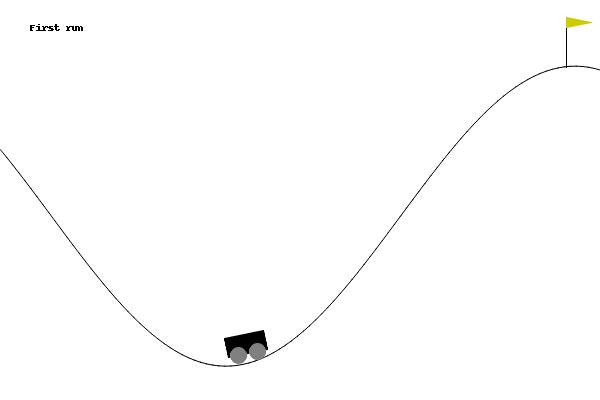

In [3]:
from IPython.display import Image as IpyImg

total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title="First run", render=False)

display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

In [7]:
from IPython.display import Image as IpyImg

HOW_MANY_ITERATIONS = 1
EPISODES_PER_ITERATION = 350
REPLAY_FREQUENCY=4
mname = "fooo.model"

total_rewards = []
total_avg_rewards   = []
total_timings = []


for i in range(HOW_MANY_ITERATIONS):
    rewards, avg_rewards, timings, infos_lists = agent.learning(env=env,episodes=EPISODES_PER_ITERATION, replay_frequency=REPLAY_FREQUENCY, mname=mname, verbose=True)
    total_rewards += rewards
    total_avg_rewards += avg_rewards
    total_timings += timings
    title=f"After {(i+1)*EPISODES_PER_ITERATION} episodes"
    total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title=title, render=False, verbose=False)
    display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

13:11:56	Episode	1	timesteps:	200	Took	1.839755 sec - reward:	[-200.0, -54.0, -90.0]	| 100AvgReward: [-200.0, -54.0, -90.0]
13:11:57	Episode	2	timesteps:	200	Took	1.838911 sec - reward:	[-200.0, -50.0, -93.0]	| 100AvgReward: [-200.0, -52.0, -91.5]
13:11:59	Episode	3	timesteps:	200	Took	1.896779 sec - reward:	[-200.0, -59.0, -64.0]	| 100AvgReward: [-200.0, -54.333333333333336, -82.33333333333333]
13:12:01	Episode	4	timesteps:	200	Took	1.91801 sec - reward:	[-200.0, -51.0, -63.0]	| 100AvgReward: [-200.0, -53.5, -77.5]
13:12:03	Episode	5	timesteps:	200	Took	1.866182 sec - reward:	[-200.0, -64.0, -76.0]	| 100AvgReward: [-200.0, -55.6, -77.2]
13:12:05	Episode	6	timesteps:	200	Took	1.828019 sec - reward:	[-200.0, -70.0, -76.0]	| 100AvgReward: [-200.0, -58.0, -77.0]
13:12:07	Episode	7	timesteps:	200	Took	1.879133 sec - reward:	[-200.0, -40.0, -87.0]	| 100AvgReward: [-200.0, -55.42857142857143, -78.42857142857143]
13:12:09	Episode	8	timesteps:	200	Took	1.876315 sec - reward:	[-200.0, -54.0, -8

: 

: 

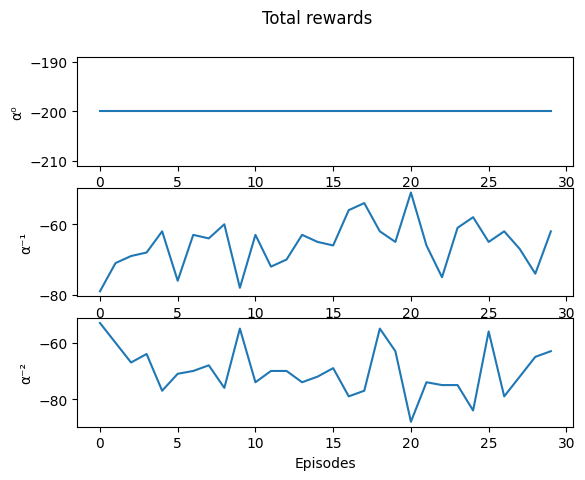

In [ ]:
from LMORL.BAN.API.ban_utils import Ban

%matplotlib inline

r = Ban.display_plot(total_rewards, len(total_rewards), "Total rewards")

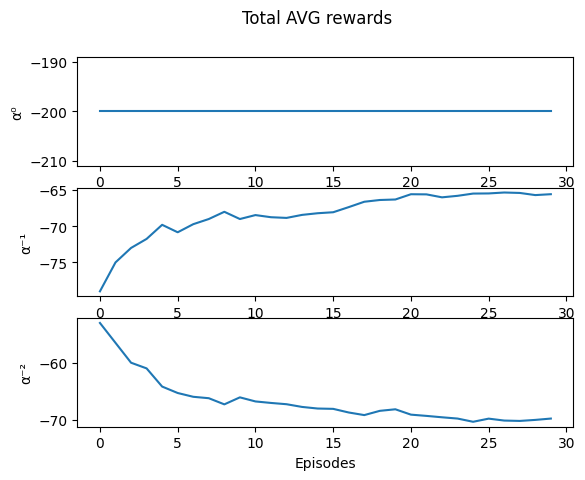

In [ ]:
r = Ban.display_plot(total_avg_rewards, len(total_avg_rewards), "Total AVG rewards")